# Importação         

In [61]:
import pandas as pd
import numpy as npfcvxv
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import datetime

In [62]:
df = pd.read_csv("BancoDeDados.csv")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

# função para gerar gráficos

In [64]:
def plot_perc(titulo, st, dados):
  plt.figure(figsize=(20,8))
  
  g = sns.countplot(x=st, data=dados, orient='h')
  g.set_ylabel('contagem', fontsize=17)
  g.set_title(titulo)
  
  sizes = []
  
  for p in g.patches:
    height = p.get_height()
    
    sizes.append(height)
    
    g.text(p.get_x() + p.get_width()/1.6,
           height+200,
           '{:1.2f}%'.format(height/116581*100),
           ha='center',va='bottom',fontsize=12)
    
  g.set_ylim(0,max(sizes)*1.1)
  
  g.plot()

# Números de compradores por estado

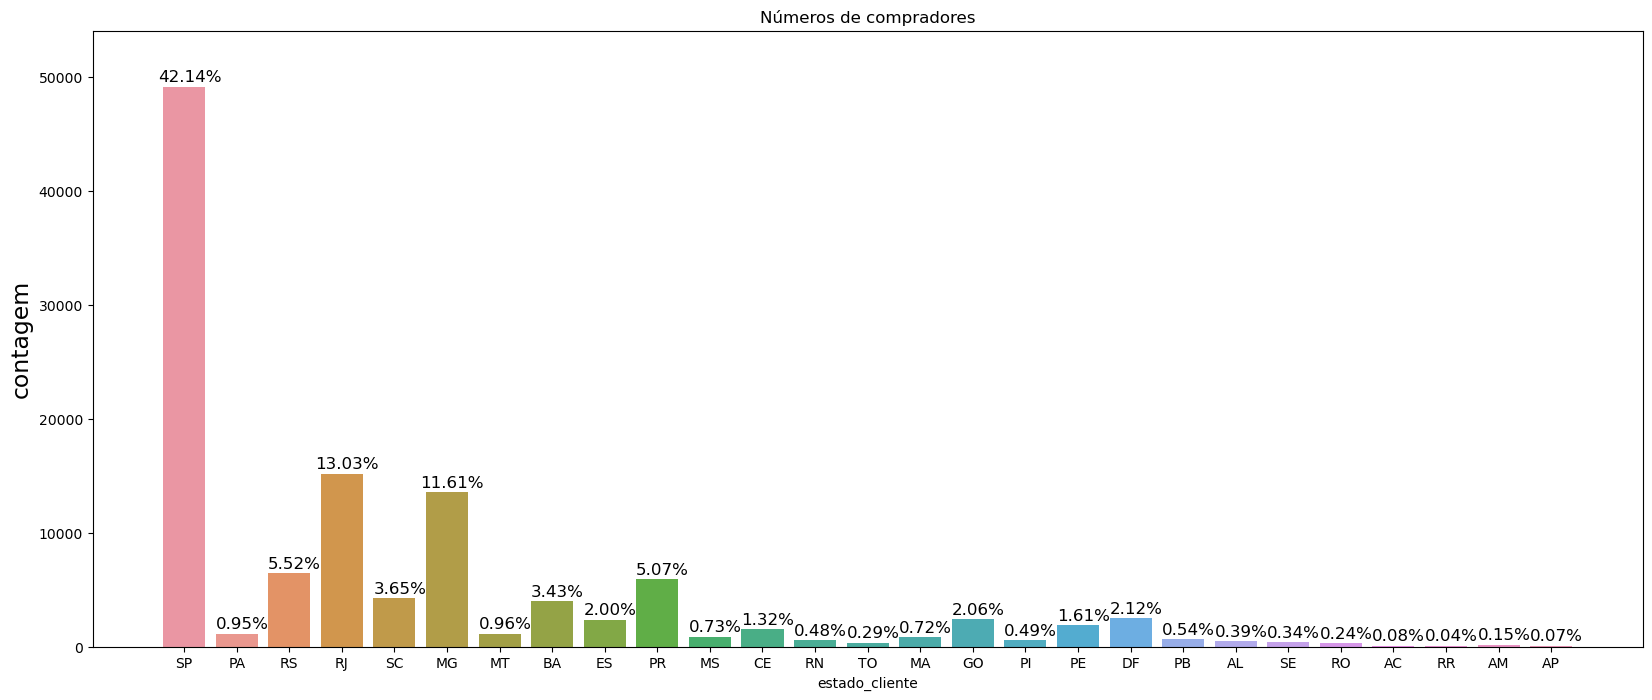

In [65]:
plot_perc("Números de compradores", "estado_cliente", df)

# Números de vendedores por estado

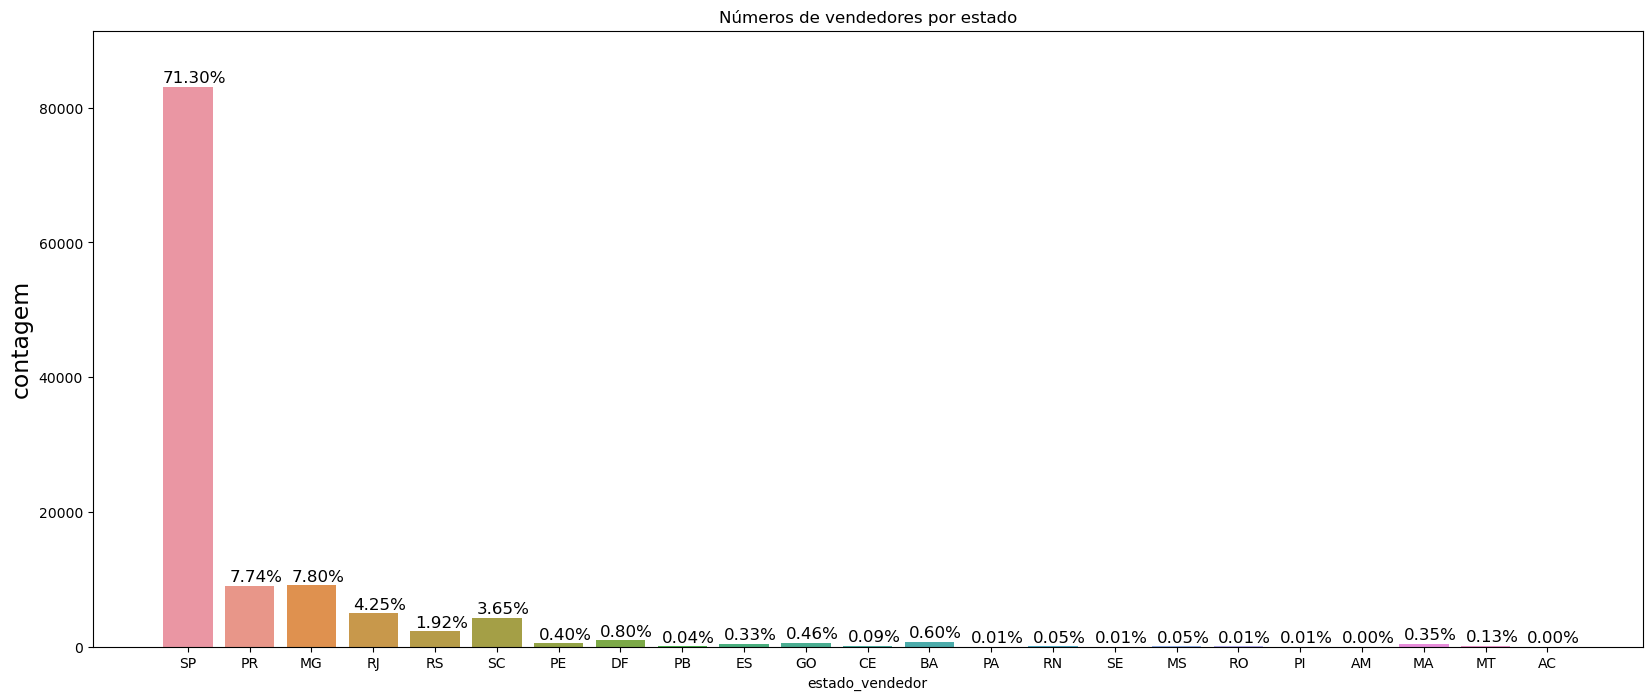

In [66]:
plot_perc("Números de vendedores por estado", "estado_vendedor", df)

# Tipo de pagamento mais usado

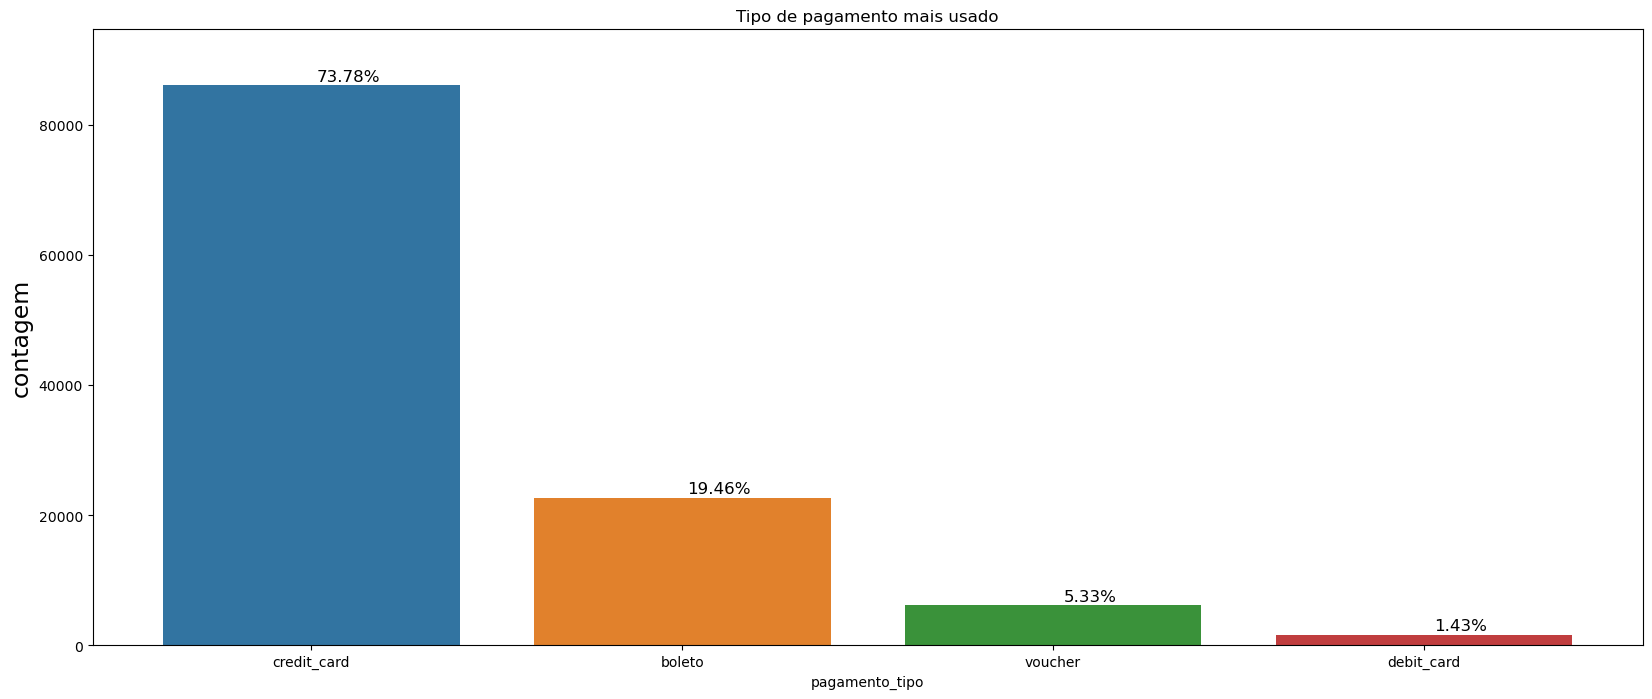

In [67]:
plot_perc("Tipo de pagamento mais usado", "pagamento_tipo", df)

# RFM

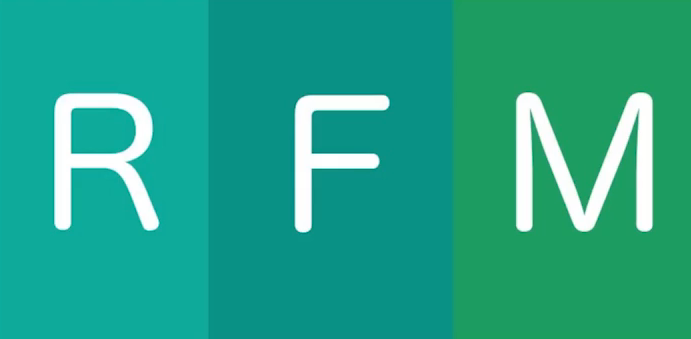

# Recência
Há quantos dias foi a última compra desse cliente?

# Frequência
Quantas compras esse cliente já fez na suam empresa, desde que se cadastrou?

# Monetaridade
Quanto esse cliente já gastou em dinheiro na sua empresa?

In [68]:
# Colunas selecionadas
df_olist = df[['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco']]

# Exibe essas colunas
df_olist

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99
...,...,...,...,...,...
116576,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49
116577,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00
116578,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90


In [69]:
# Pega a maior data por id
df_compra = df.groupby('id_unico_cliente')['horario_pedido'].max().reset_index()

# Renomeia a coluna 'horario_pedido' para 'DataMaxCompra'
df_compra.columns = ['id_unico_cliente', 'DataMaxCompra']

# Transforma o tipo de 'DataMaxCompra' para datetime
df_compra['DataMaxCompra'] = pd.to_datetime(df_compra['DataMaxCompra'])

# Exibe este DataFrame
df_compra

,id_unico_cliente,DataMaxCompra
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
94082,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
94083,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
94084,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
94085,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [ ]:
# A distancia de cada compra para a data mais atual de cada cliente
df_compra['Recencia'] = (df_compra['DataMaxCompra'].max() - df_compra['DataMaxCompra']).dt.days

In [73]:
df_usario = pd.merge(df_olist, df_compra[['id_unico_cliente', 'Recencia']], on='id_unico_cliente')

df_usario

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211
...,...,...,...,...,...,...
116576,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,12
116577,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,41
116578,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,41
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,36
